In [1]:
from data_analysis.StockDataCombiner import StockDataCombiner

#combiner = StockDataCombiner('../decathlon_scraper/data/sportgear/stocks')
#combined_df = combiner.combine_csv_files()
#combiner.save_combined_data('combined_stock_data.csv')

In [2]:
# read in combine stock data
import pandas as pd
df = pd.read_csv('combined_stock_data.csv')

In [3]:
# list columns
print(df.columns)

Index(['id', 'main_category', 'sub_category', 'product_name', 'brand', 'price',
       'url', 'timestamp', 'store_aboveThreshold', 'store_address',
       'store_availabilityInfo', 'store_clickNcollect1h',
       'store_favoriteStore', 'store_latitude', 'store_longitude',
       'store_optionId', 'store_originId', 'store_phoneNumber',
       'store_priceId', 'store_quantity', 'store_quantityShowroom',
       'store_replenishmentEndDate', 'store_replenishmentStartDate',
       'store_securedStockLevel', 'store_skuId', 'store_storeId',
       'store_storeName', 'store_storeSchedule', 'store_storeUrl'],
      dtype='object')


In [4]:
# for first insight, only relevant considered features are selected
df = df[['id', 'timestamp', 'main_category', 'sub_category', 'product_name', 'brand', 'price', 'store_skuId','store_storeId',
       'store_storeName', 'store_quantity', 'store_availabilityInfo','store_clickNcollect1h']]

# save reduced version as csv
#df.to_csv('reduced_features_stock_data.csv', index=False)

In [5]:
# print df types
print(df.dtypes)

id                         int64
timestamp                 object
main_category             object
sub_category              object
product_name              object
brand                     object
price                     object
store_skuId               object
store_storeId              int64
store_storeName           object
store_quantity             int64
store_availabilityInfo    object
store_clickNcollect1h       bool
dtype: object


In [6]:
# set store_storeId as category
df['store_storeId'] = df['store_storeId'].astype('object')

In [7]:
# Frequency distribution for categorical fields
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())

timestamp
2024-05-13 17:49:55.369006    115
2024-05-13 17:39:37.940233    115
2024-05-13 17:28:46.790607    115
2024-05-13 17:53:17.533821    115
2024-05-13 17:21:45.940138    115
                             ... 
2024-05-13 17:07:20.381248     20
2024-05-13 16:46:59.539599     20
2024-05-13 17:06:02.467105     20
2024-05-08 19:31:37.134882     20
2024-05-13 16:43:51.156040     19
Name: count, Length: 423, dtype: int64
main_category
fahrrad-welt    18085
fitness          2603
camping          2477
Name: count, dtype: int64
sub_category
fahrrader                    10975
fahrrad_sale                  7110
fitnessgerate-fur-zuhause     2603
zelte                         2477
Name: count, dtype: int64
product_name
Rennrad – EDR Easy Van Rysel weiss                                      1236
E-Mountainbike E-Expl 520 Hardtail 29 Zoll gelb                         1023
City Bike 28 Zoll Elops Speed 500 Singlespeed/Fixie gelb                 938
City Bike 28 Zoll Elops 520 LF Damen blau       

In [8]:
# print head
print(df.head(2))

        id                   timestamp main_category sub_category  \
0  8731616  2024-05-06 18:57:27.217238       camping        zelte   
1  8492484  2024-05-06 18:57:27.217238       camping        zelte   

                                        product_name    brand     price  \
0  Familienzelt Stangenaufbau - Arpenaz 4.1 Fresh...  QUECHUA  199,99 €   
1  Wurfzelt XL - 2 Seconds Fresh & Black für 3 Pe...  QUECHUA  164,99 €   

  store_skuId store_storeId        store_storeName  store_quantity  \
0     4456574   70098000980  Berlin-Alexanderplatz              15   
1     2556864   70098000980  Berlin-Alexanderplatz              16   

  store_availabilityInfo  store_clickNcollect1h  
0                inStock                   True  
1                inStock                   True  


# Analysis of Stock Changes in an Area

In [10]:
# Ensure the store_storeId column is of string type and strip any whitespace
df['store_storeId'] = df['store_storeId'].astype(str).str.strip()

# Pad the store_storeId values with leading zeros to ensure 13 characters
df['store_storeId'] = df['store_storeId'].str.zfill(13)

# Filter for a specific area
import decathlon_scraper.StoresEnum as StoresEnum
nrw_area = StoresEnum.RuhrgebietStores

# Create a list with the enum values, ensuring no leading/trailing whitespace
nrw_stores = [str(store.value).strip() for store in nrw_area]

# Filter for the stores in the area
nrw_df = df[df['store_storeId'].isin(nrw_stores)]

# Group by 'id' and 'store_skuId' and count the occurrences
product_counts = nrw_df.groupby(['id', 'store_skuId']).size().reset_index(name='count')

# Print the results
print(product_counts)

# If you want to filter and find products that are available in more than one store
same_products_across_stores = product_counts[product_counts['count'] > 1]

# Print the products that are available in more than one store
print(same_products_across_stores)


          id                           store_skuId  count
0          9  ef8ab573-810a-41bb-beaa-972c6e162043     29
1         22  220bdc2e-0635-4923-a529-7fb9d6c51743      6
2         22  3fe0be59-7665-41b8-a94b-23ab9695c7b9      6
3         22  606d8a1c-799f-498d-8483-9423e9f28bb3      6
4         22  79fc8e55-df57-4f8d-8dc1-ce8029d69d2d      6
..       ...                                   ...    ...
275  8872755                               5165161     40
276  8872755                               5165162     40
277  8872755                               5165163     40
278  8872755                               5165164     40
279  8902450                               5306794     10

[280 rows x 3 columns]
          id                           store_skuId  count
0          9  ef8ab573-810a-41bb-beaa-972c6e162043     29
1         22  220bdc2e-0635-4923-a529-7fb9d6c51743      6
2         22  3fe0be59-7665-41b8-a94b-23ab9695c7b9      6
3         22  606d8a1c-799f-498d-8483-9423e9f28b

C:\Users\FelixNeubauer\AppData\Local\Temp\ipykernel_32628\2213481607.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x='main_category', y='product_count', palette='viridis')


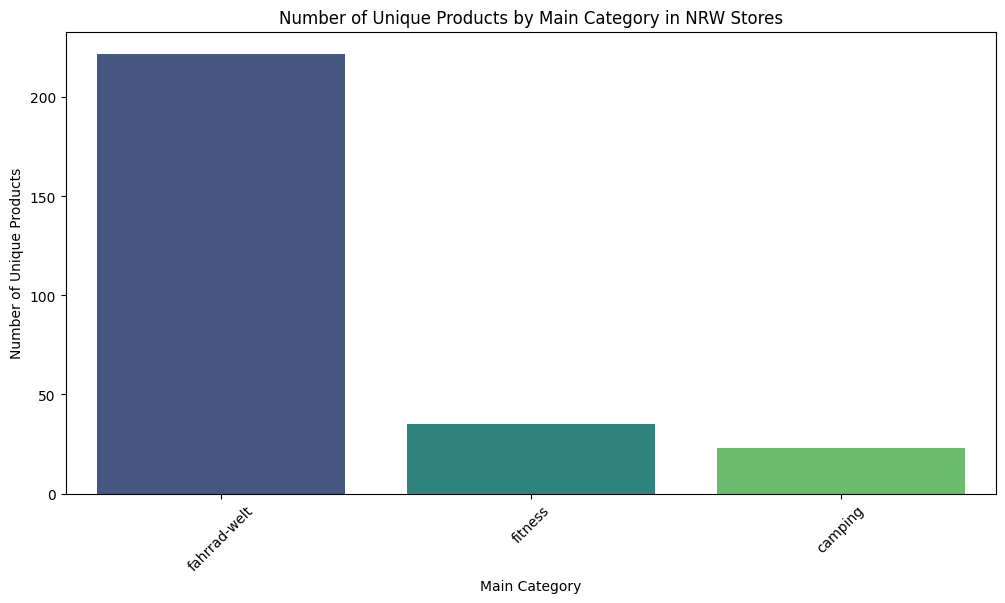

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the same_products_across_stores DataFrame with the original nrw_df to get the main_category
merged_df = same_products_across_stores.merge(nrw_df, on=['id', 'store_skuId'])

# Drop duplicates to ensure each product is counted only once per main category
unique_products = merged_df.drop_duplicates(subset=['id', 'store_skuId', 'main_category'])

# Group by main_category and count the unique products
category_counts = unique_products['main_category'].value_counts().reset_index()
category_counts.columns = ['main_category', 'product_count']

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=category_counts, x='main_category', y='product_count', palette='viridis')
plt.xlabel('Main Category')
plt.ylabel('Number of Unique Products')
plt.title('Number of Unique Products by Main Category in NRW Stores')
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x800 with 0 Axes>

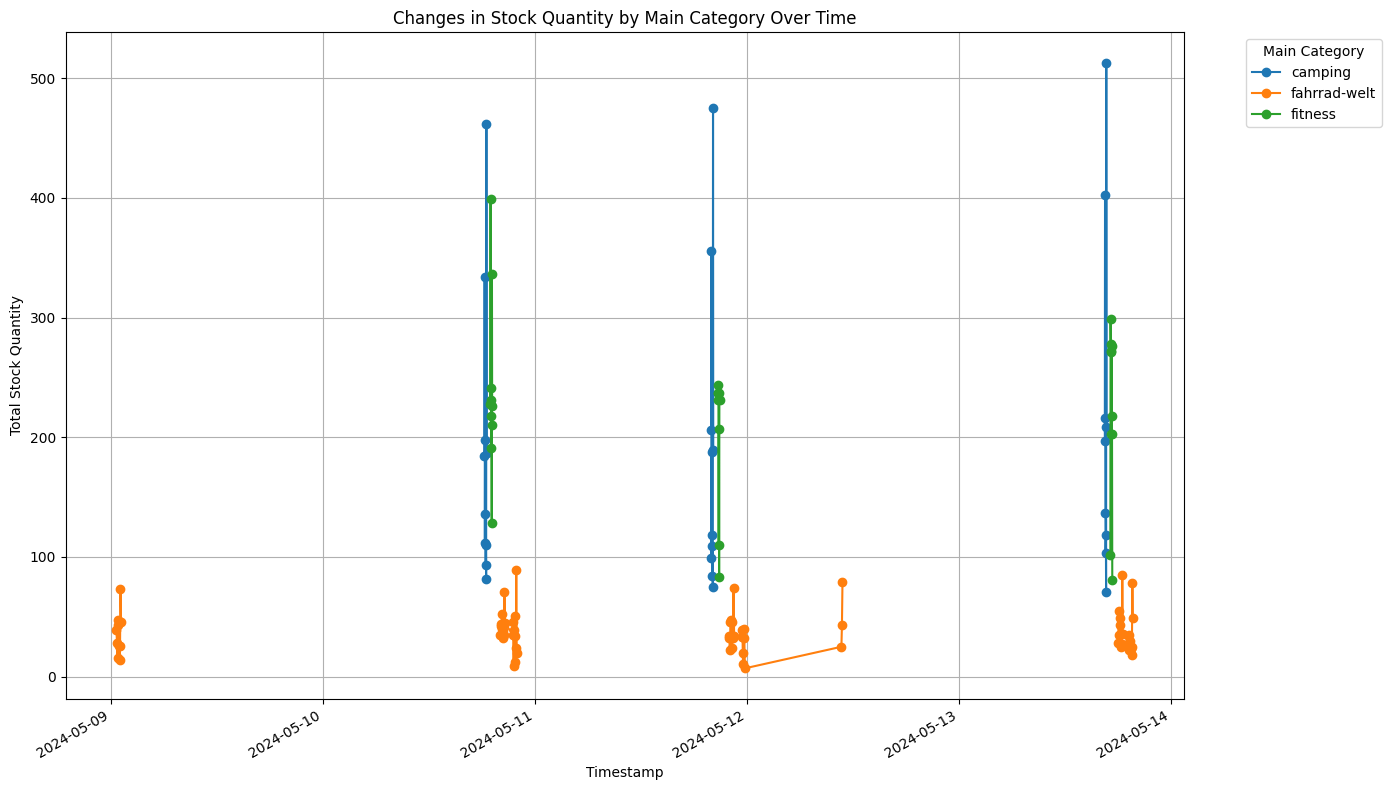

In [14]:

# Ensure the store_storeId column is of string type and strip any whitespace
df['store_storeId'] = df['store_storeId'].astype(str).str.strip()

# Pad the store_storeId values with leading zeros to ensure 13 characters
df['store_storeId'] = df['store_storeId'].str.zfill(13)

# Filter for a specific area
import decathlon_scraper.StoresEnum as StoresEnum
nrw_area = StoresEnum.RuhrgebietStores

# Create a list with the enum values, ensuring no leading/trailing whitespace
nrw_stores = [str(store.value).strip() for store in nrw_area]

# Filter for the stores in the area
nrw_df = df[df['store_storeId'].isin(nrw_stores)]

# Group by 'id' and 'store_skuId' and count the occurrences
product_counts = nrw_df.groupby(['id', 'store_skuId']).size().reset_index(name='count')

# Filter for the same products across stores
same_products_across_stores = product_counts[product_counts['count'] > 1]

# Merge with the original nrw_df to get the main_category and timestamp
merged_df = same_products_across_stores.merge(nrw_df, on=['id', 'store_skuId'])

# Drop duplicates to ensure each product is counted only once per main category
unique_products = merged_df.drop_duplicates(subset=['id', 'store_skuId', 'main_category'])

# Aggregate stock quantity per category and timestamp
aggregated_data = nrw_df.groupby(['timestamp', 'main_category'])['store_quantity'].sum().reset_index()

# Convert timestamp to datetime
aggregated_data['timestamp'] = pd.to_datetime(aggregated_data['timestamp'])

# Create a pivot table for plotting
pivot_data = aggregated_data.pivot(index='timestamp', columns='main_category', values='store_quantity')

# Plot the results
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='line', marker='o', figsize=(14, 8))
plt.xlabel('Timestamp')
plt.ylabel('Total Stock Quantity')
plt.title('Changes in Stock Quantity by Main Category Over Time')
plt.legend(title='Main Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\FelixNeubauer\AppData\Local\Temp\ipykernel_32628\1506741663.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nrw_df['timestamp'] = pd.to_datetime(nrw_df['timestamp'])


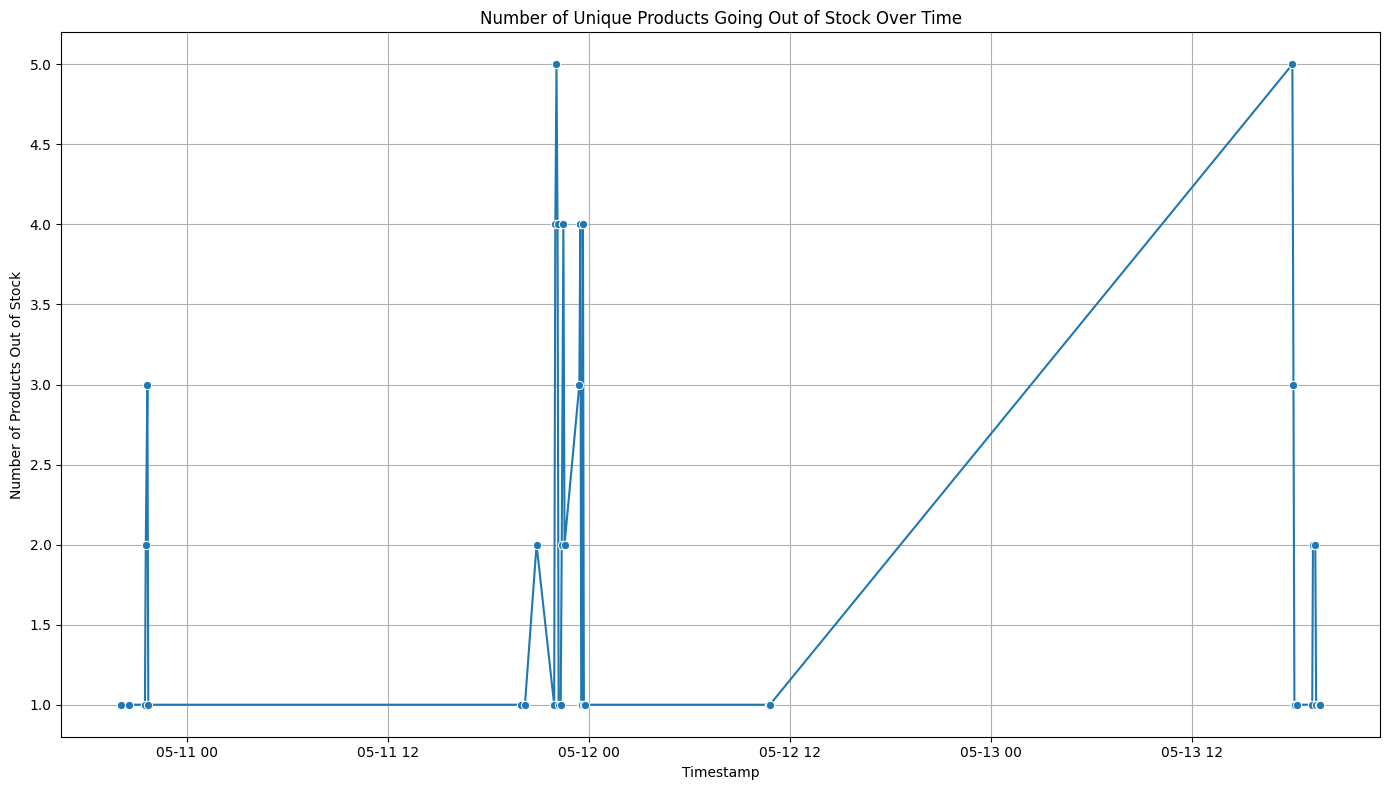

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the store_storeId column is of string type and strip any whitespace
df['store_storeId'] = df['store_storeId'].astype(str).str.strip()

# Pad the store_storeId values with leading zeros to ensure 13 characters
df['store_storeId'] = df['store_storeId'].str.zfill(13)

# Filter for a specific area
import decathlon_scraper.StoresEnum as StoresEnum
nrw_area = StoresEnum.RuhrgebietStores

# Create a list with the enum values, ensuring no leading/trailing whitespace
nrw_stores = [str(store.value).strip() for store in nrw_area]

# Filter for the stores in the area
nrw_df = df[df['store_storeId'].isin(nrw_stores)]

# Convert timestamp to datetime
nrw_df['timestamp'] = pd.to_datetime(nrw_df['timestamp'])

# Sort the DataFrame by id, store_skuId, store_storeId, and timestamp
nrw_df = nrw_df.sort_values(by=['id', 'store_skuId', 'store_storeId', 'timestamp'])

# Identify products that went out of stock
nrw_df['previous_quantity'] = nrw_df.groupby(['id', 'store_skuId', 'store_storeId'])['store_quantity'].shift(1)
out_of_stock = nrw_df[(nrw_df['store_quantity'] == 0) & (nrw_df['previous_quantity'] > 0)]

# Aggregate the number of out-of-stock products by timestamp
out_of_stock_counts = out_of_stock.groupby('timestamp').size().reset_index(name='out_of_stock_count')

# Plot the results
plt.figure(figsize=(14, 8))
sns.lineplot(data=out_of_stock_counts, x='timestamp', y='out_of_stock_count', marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Number of Products Out of Stock')
plt.title('Number of Unique Products Going Out of Stock Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\FelixNeubauer\AppData\Local\Temp\ipykernel_32628\1516380269.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nrw_df['timestamp'] = pd.to_datetime(nrw_df['timestamp'])


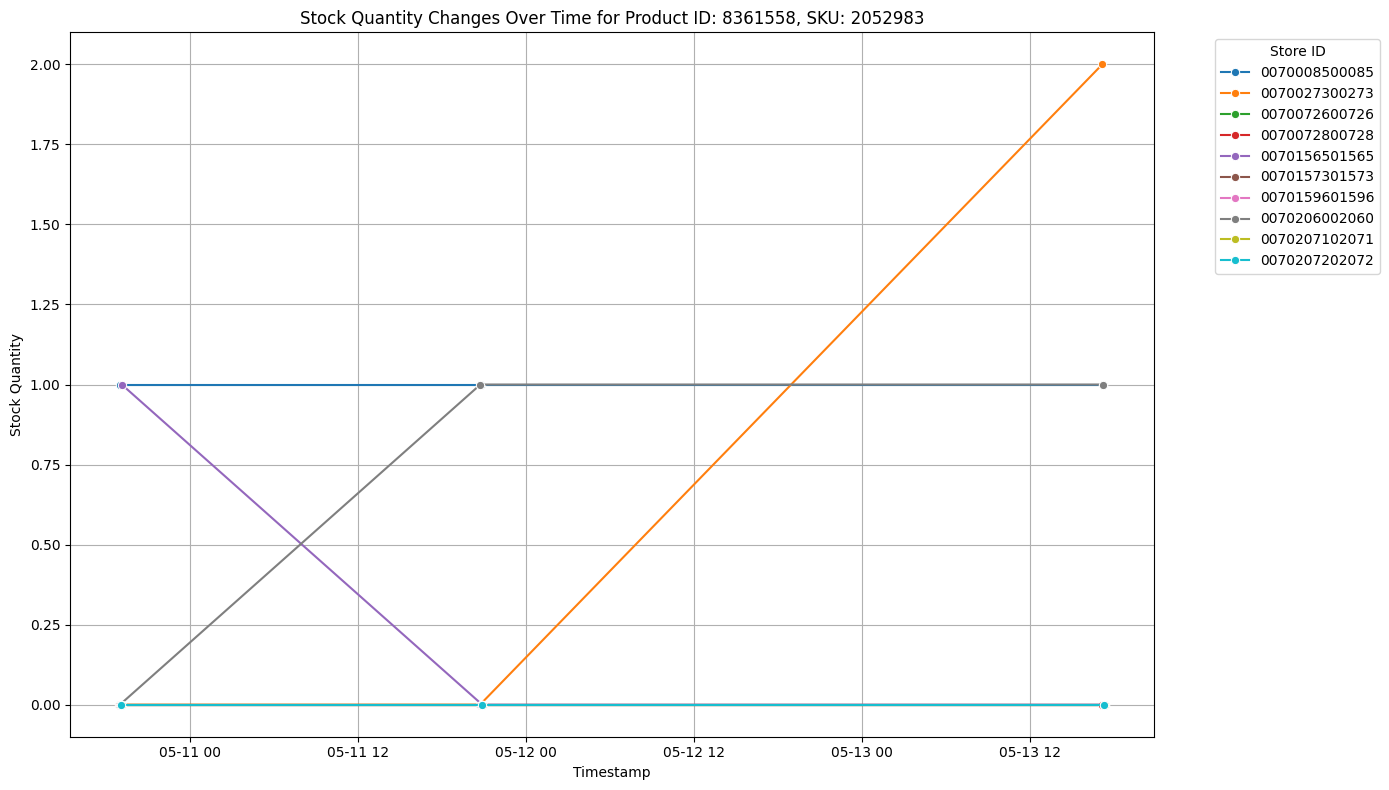

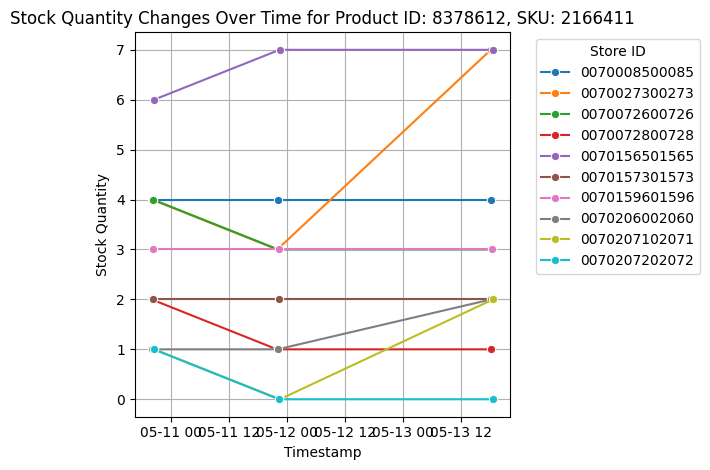

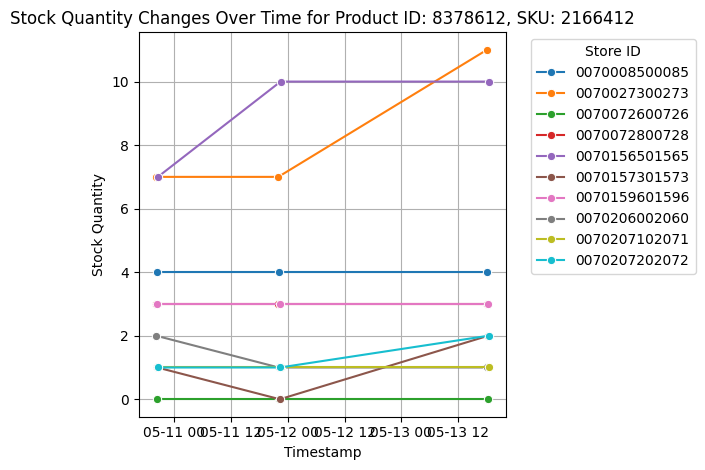

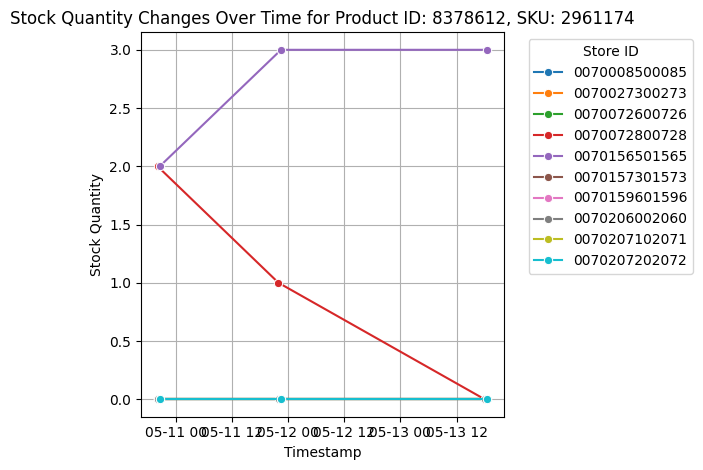

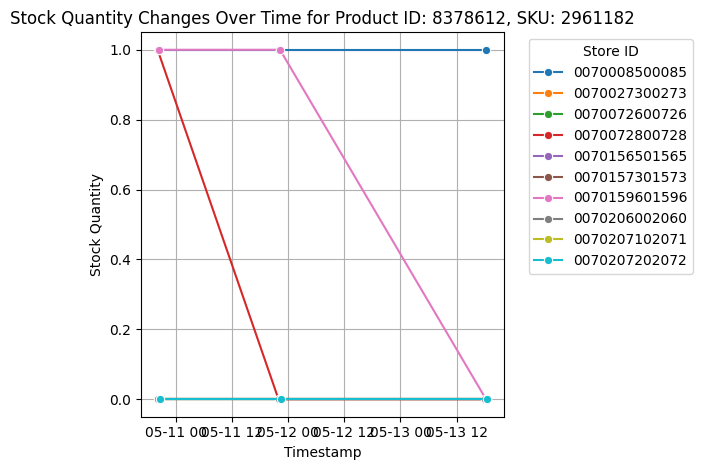

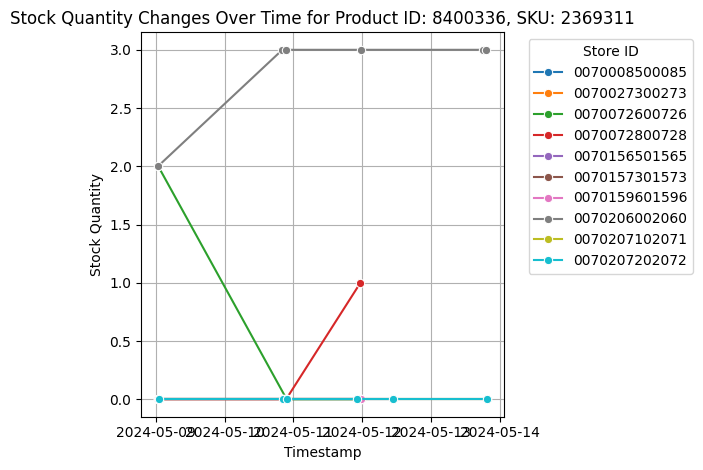

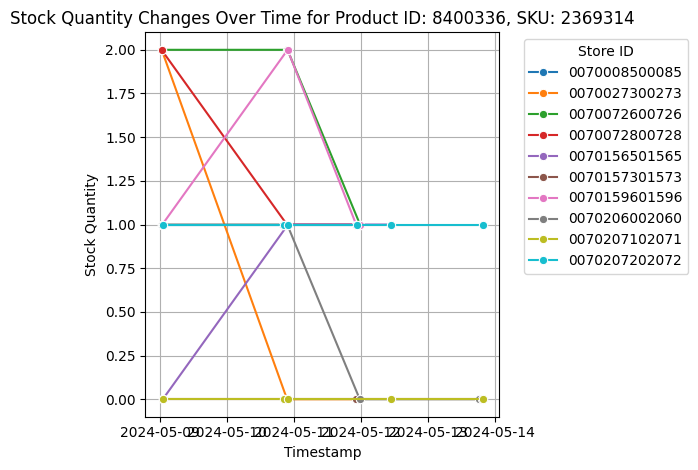

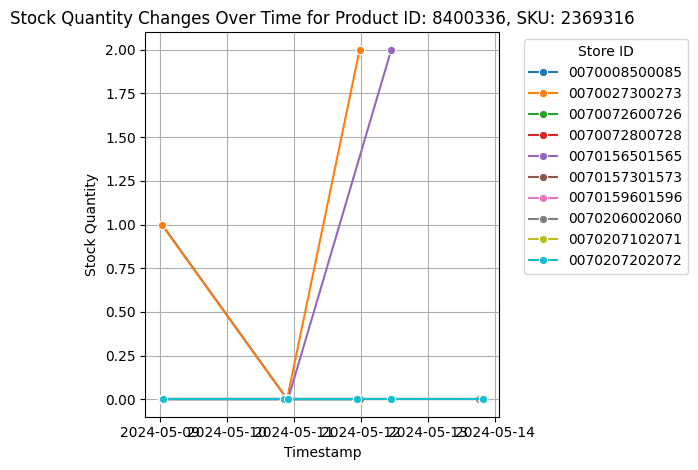

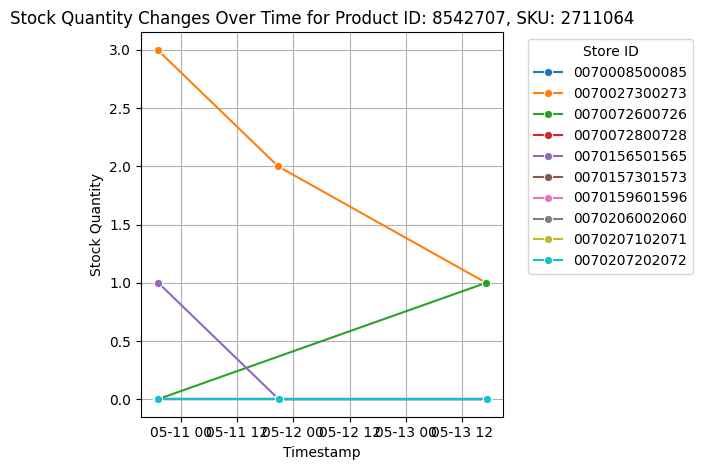

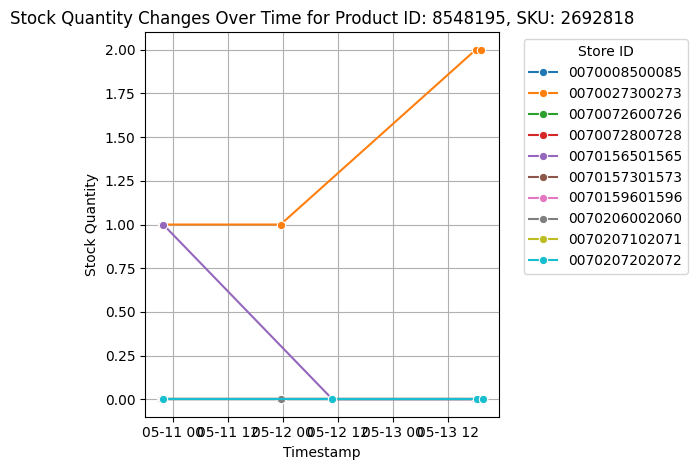

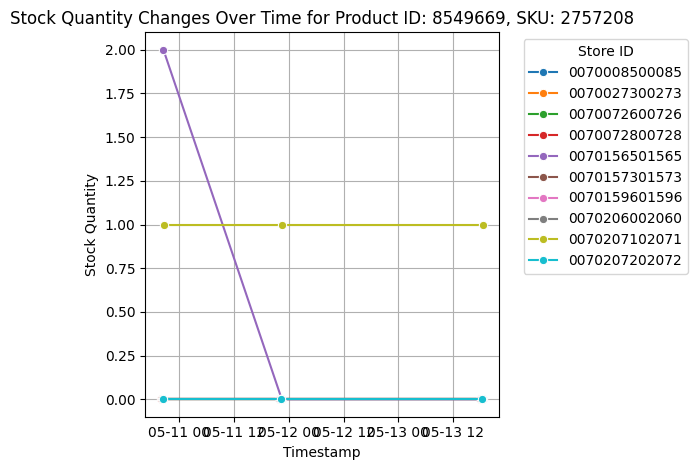

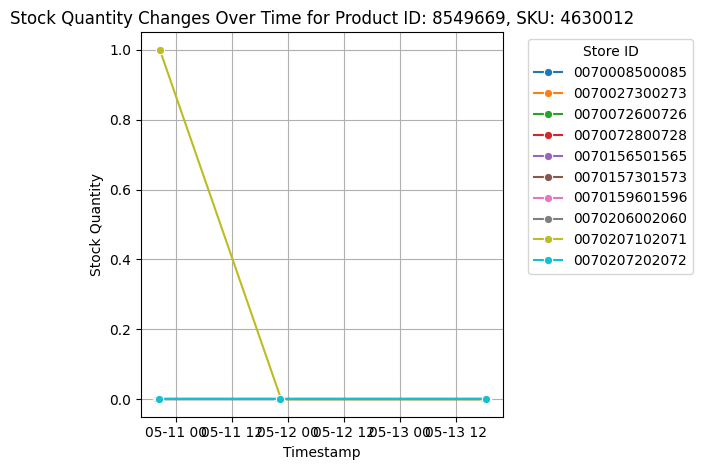

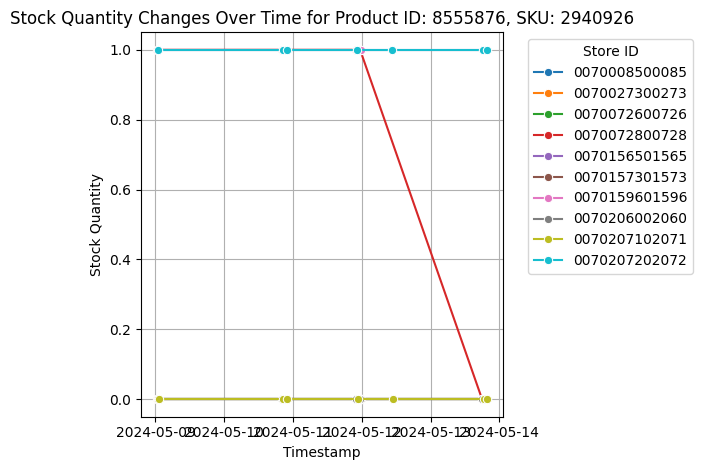

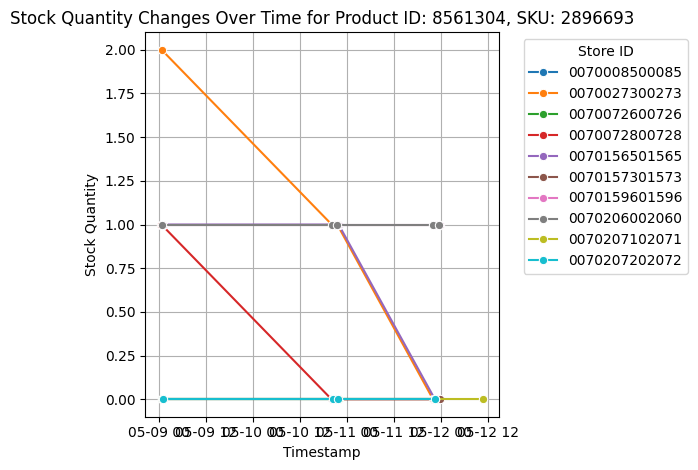

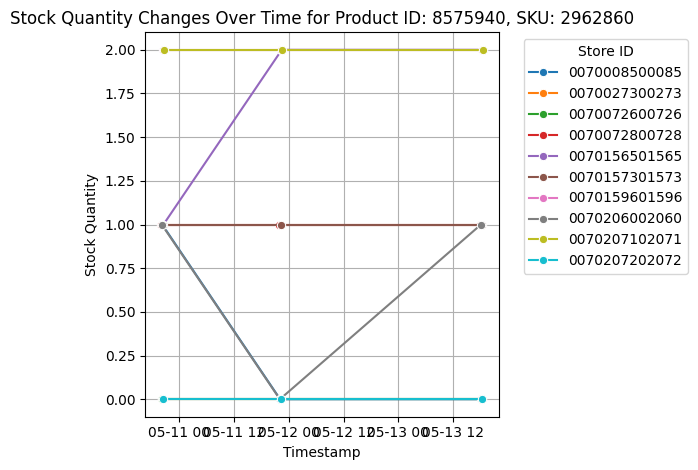

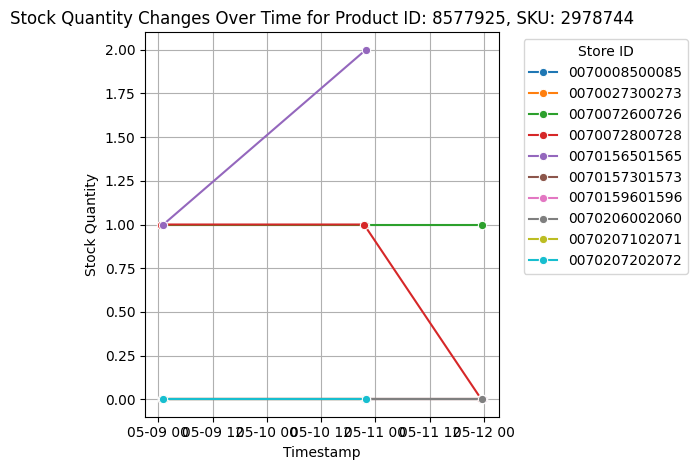

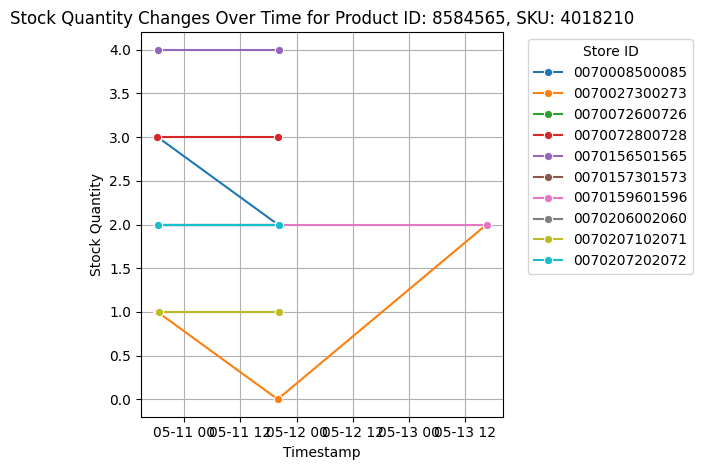

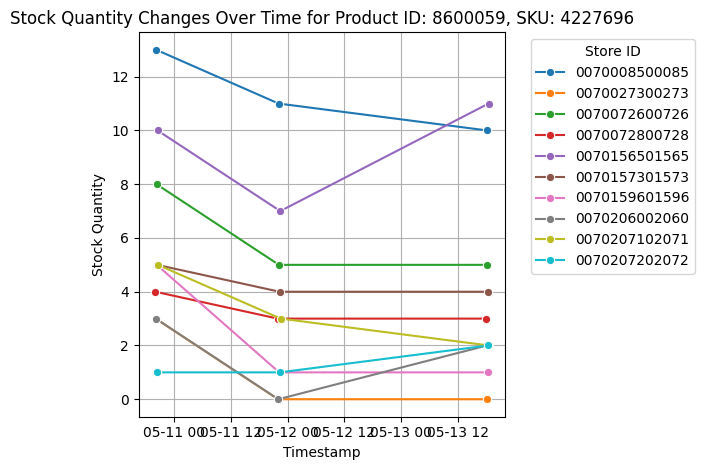

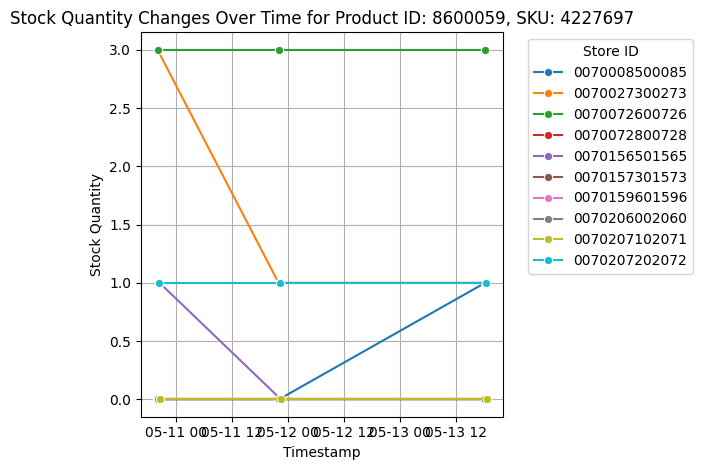

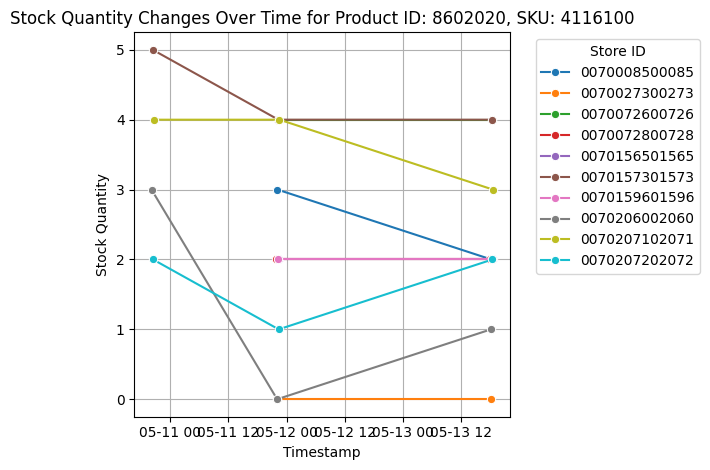

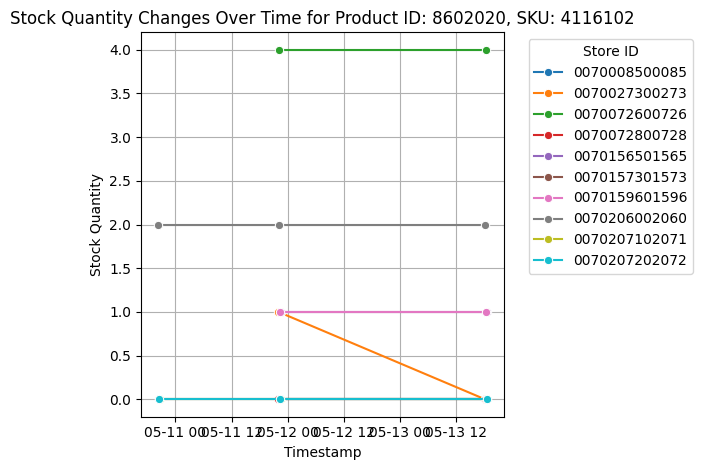

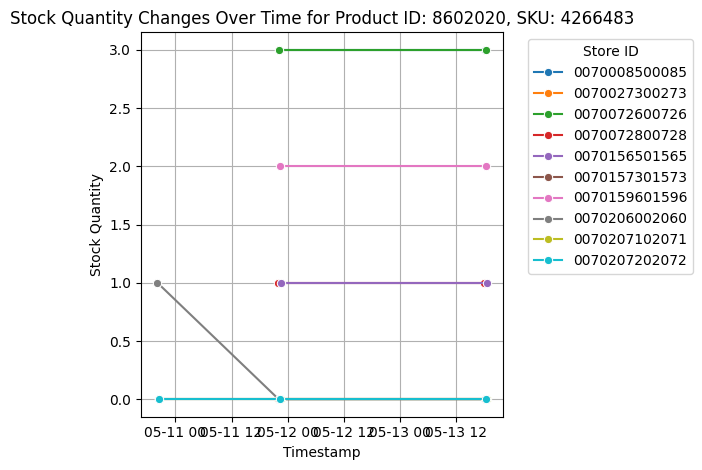

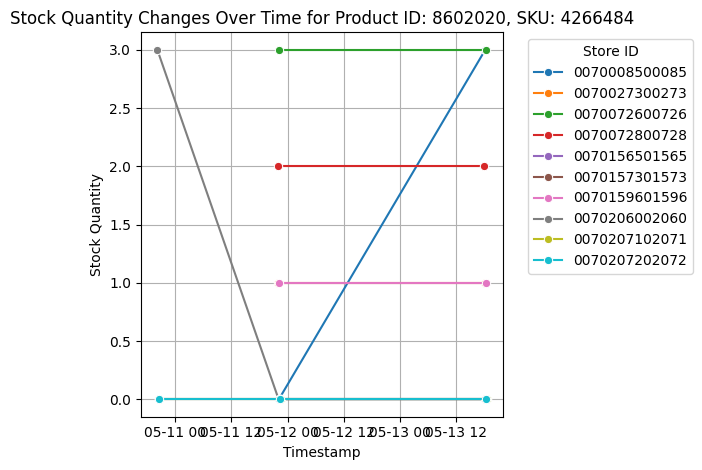

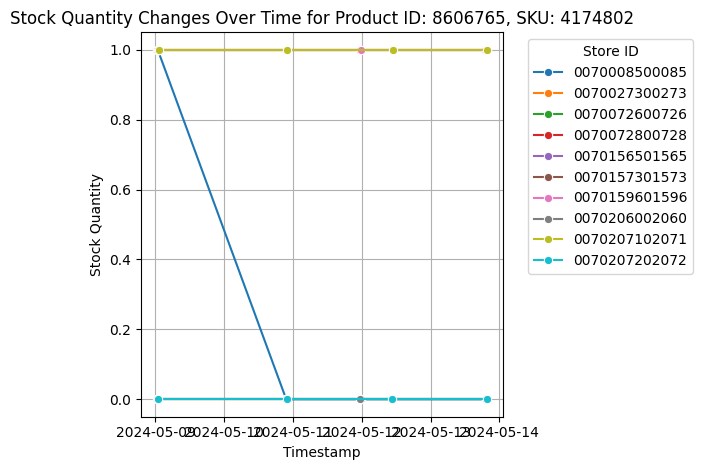

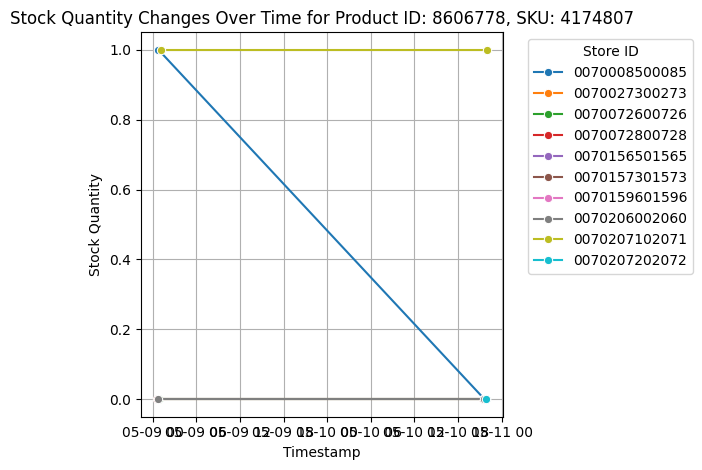

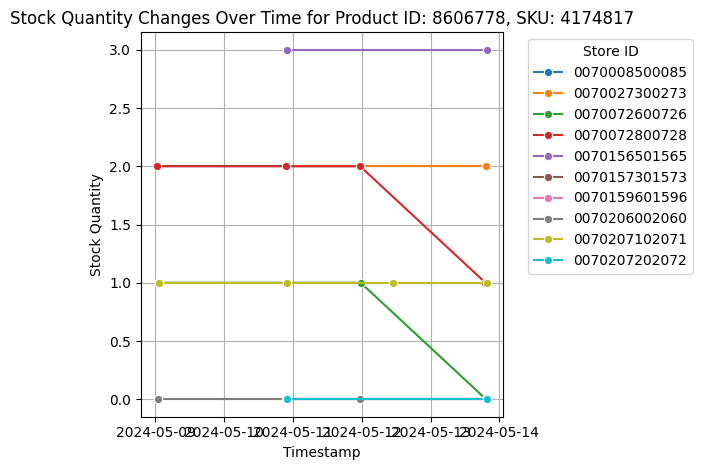

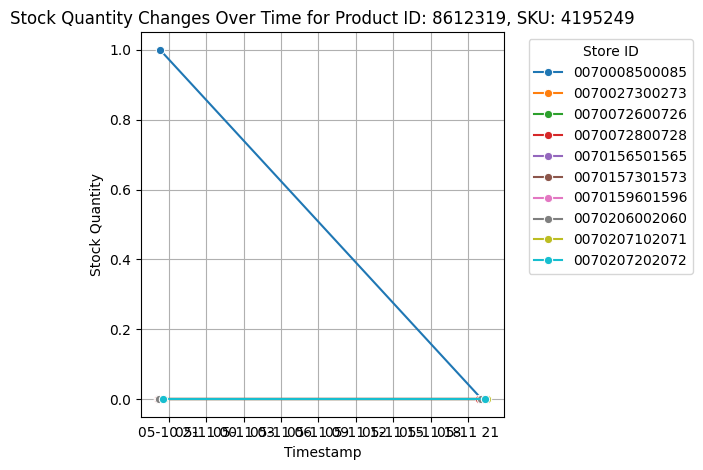

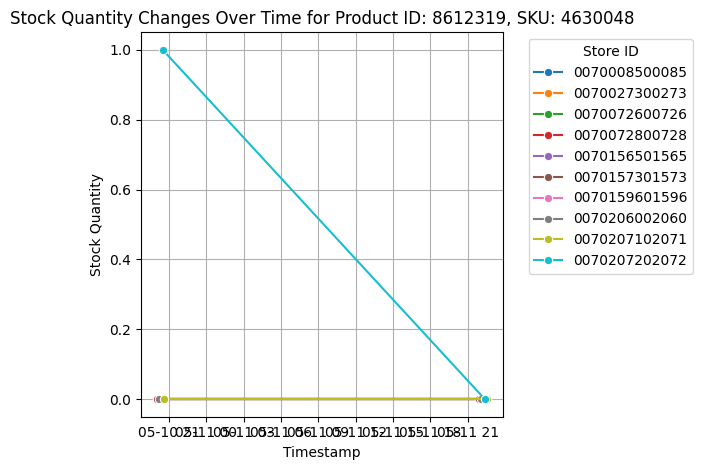

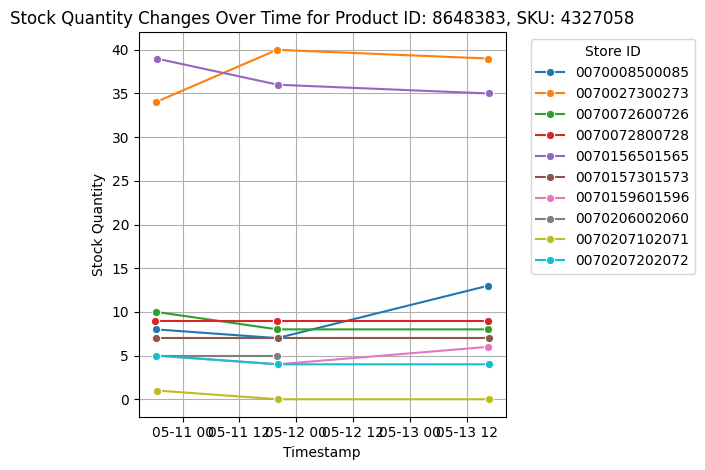

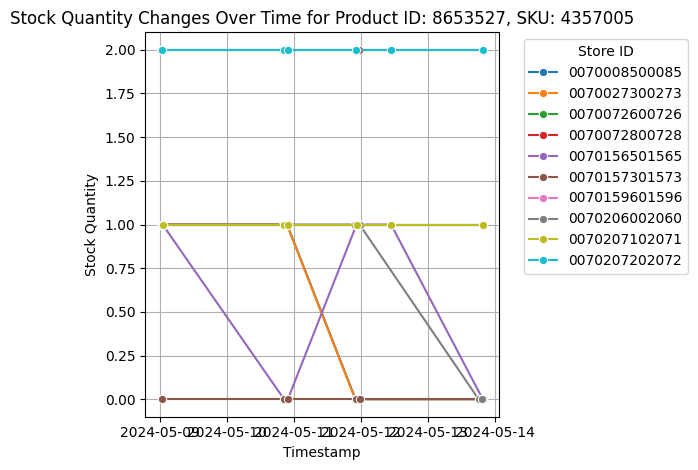

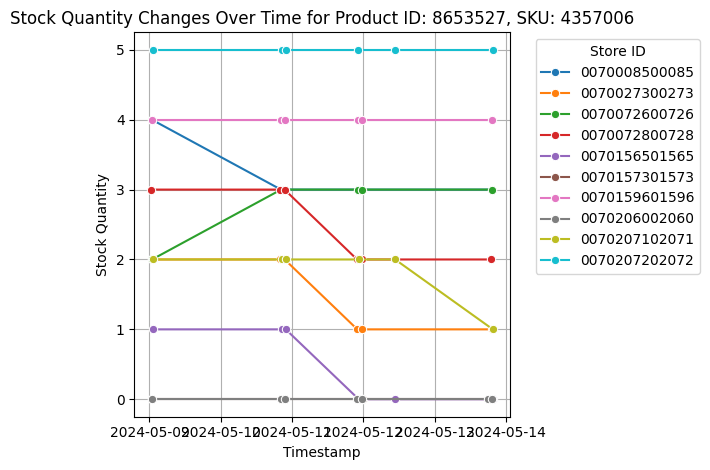

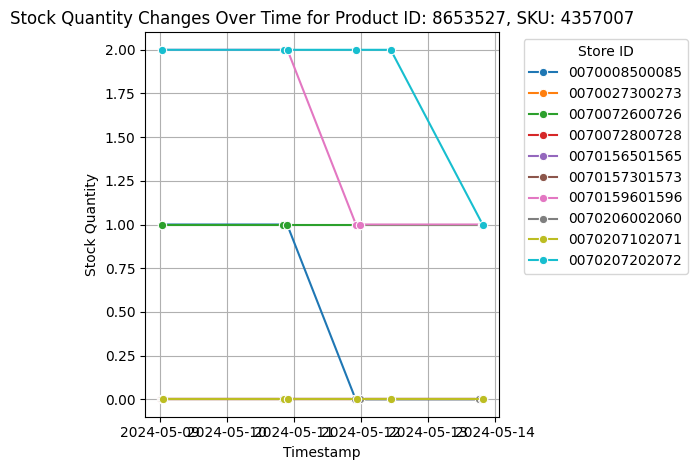

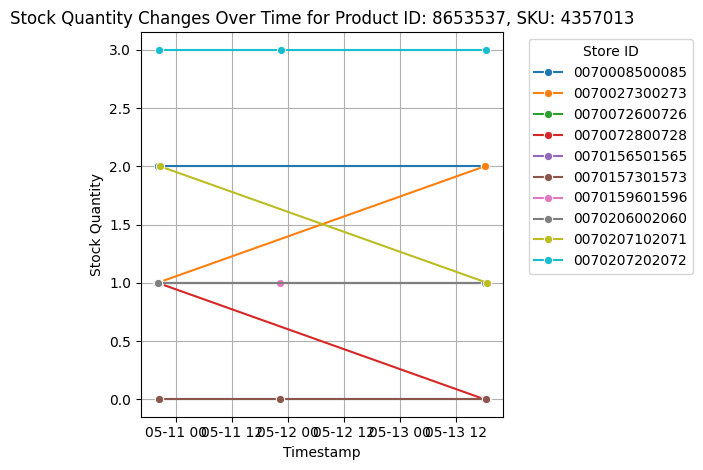

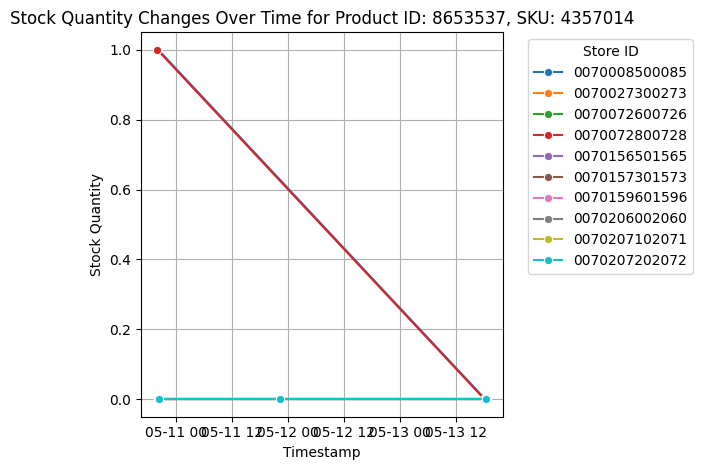

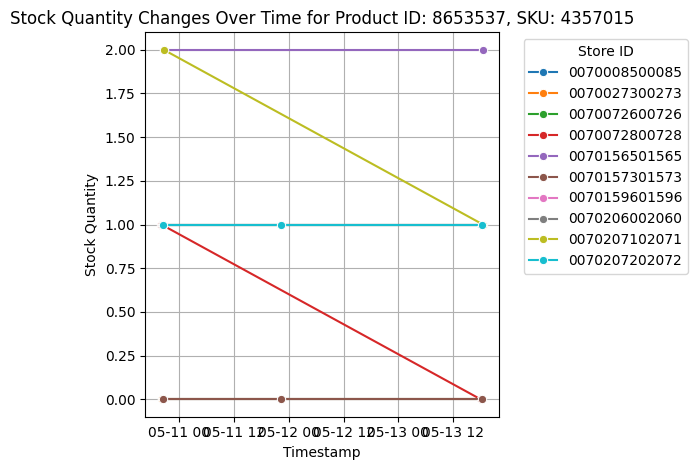

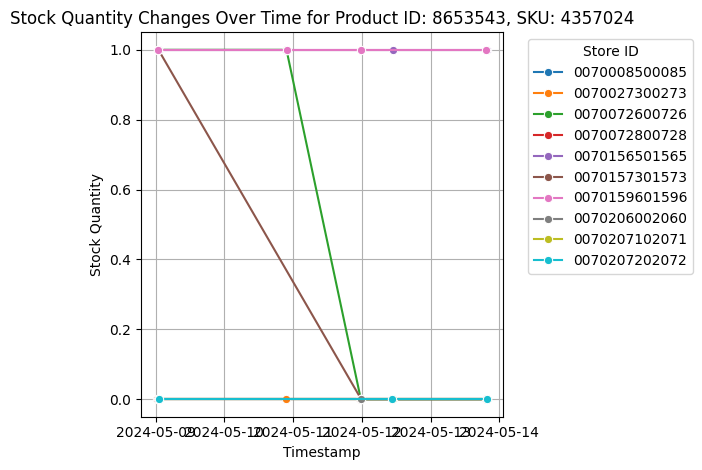

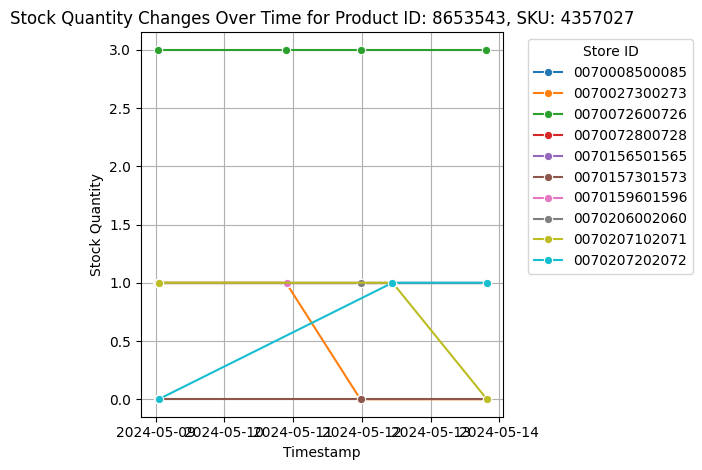

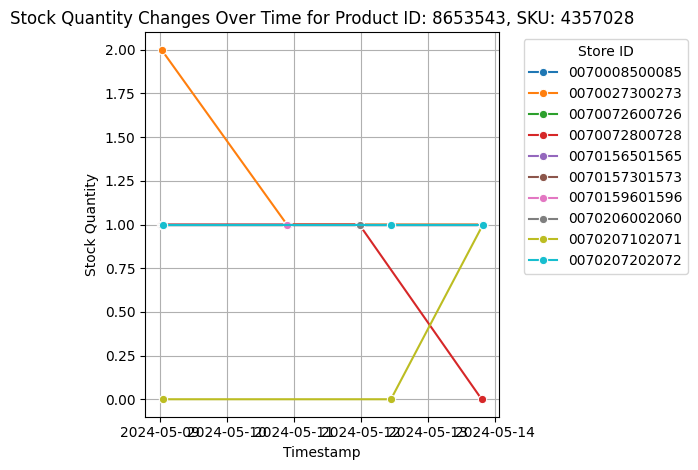

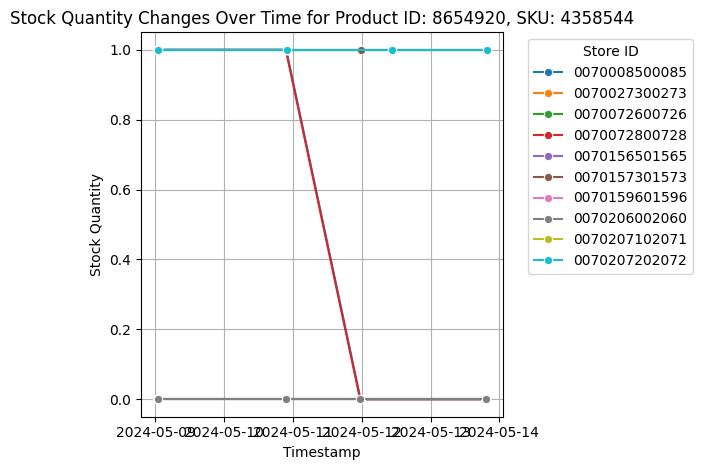

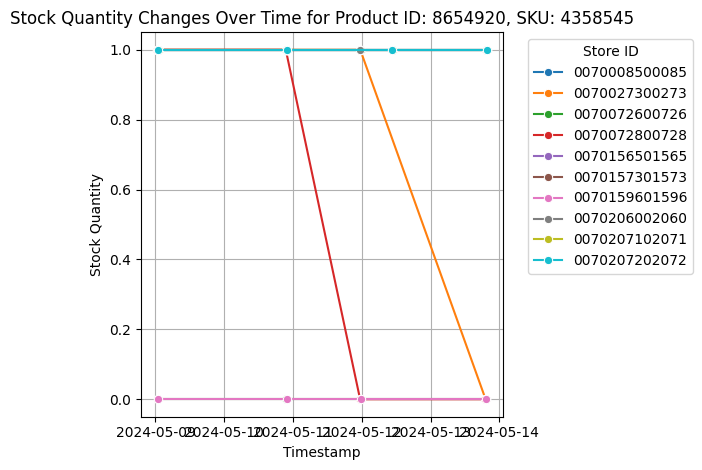

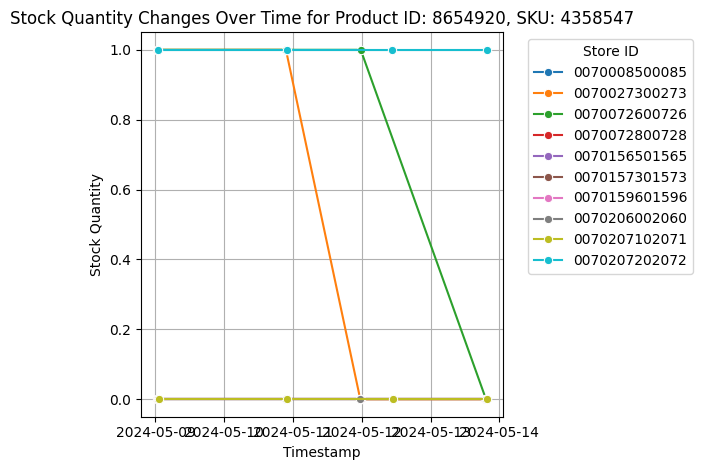

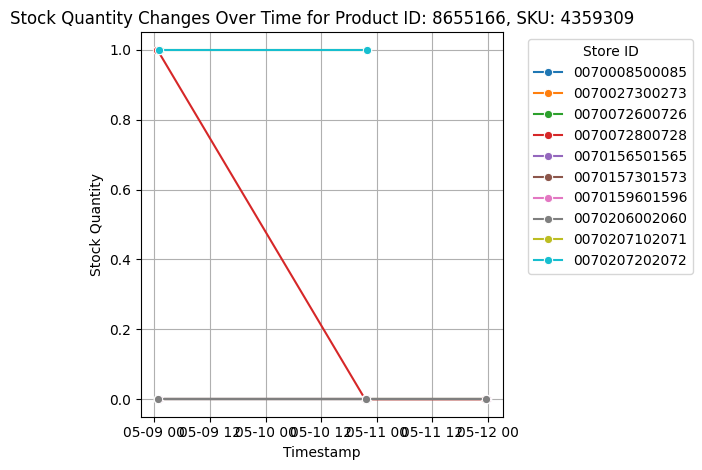

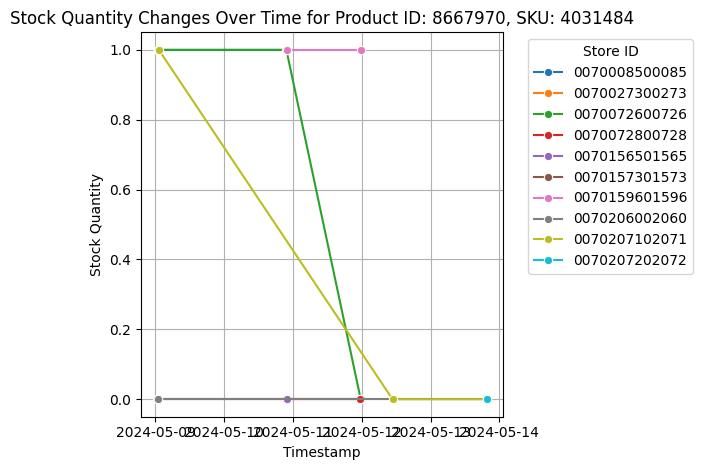

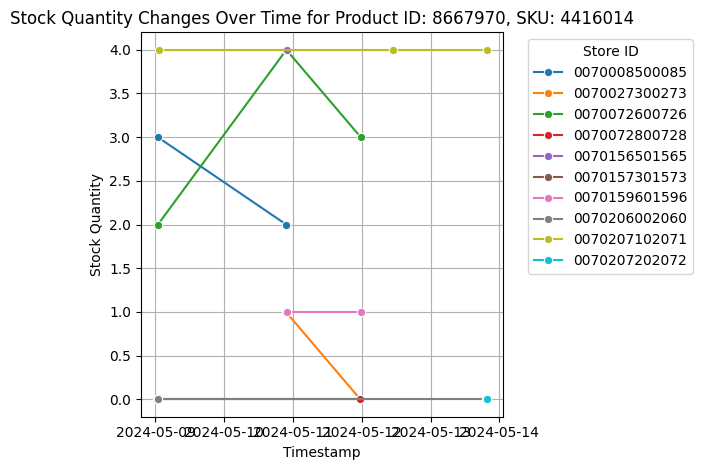

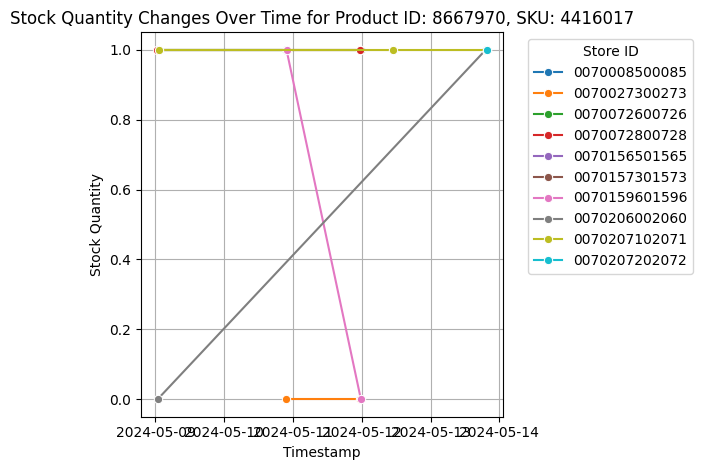

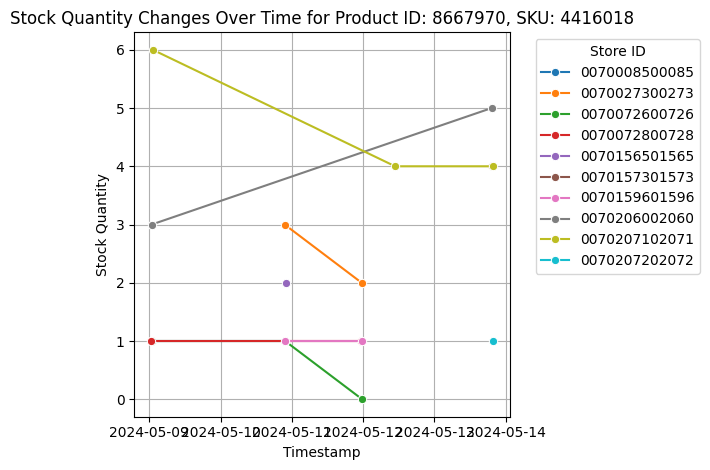

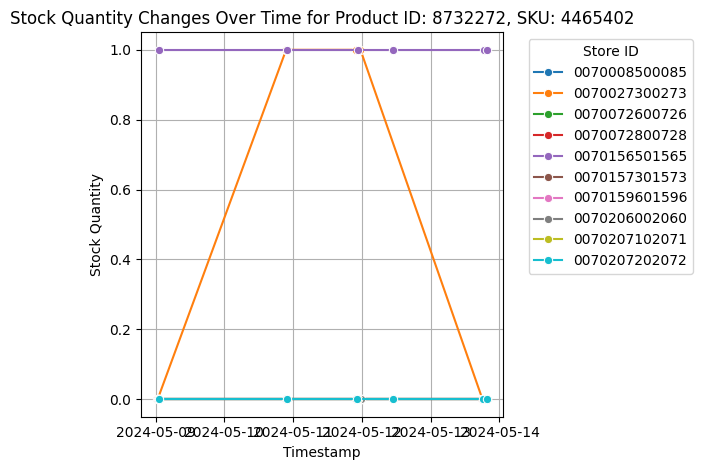

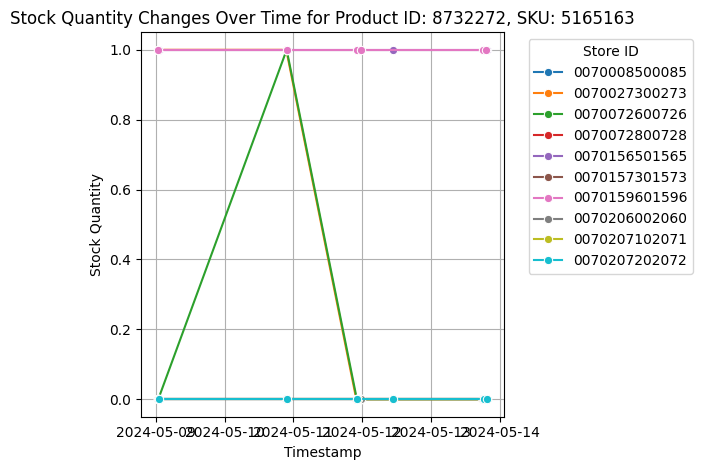

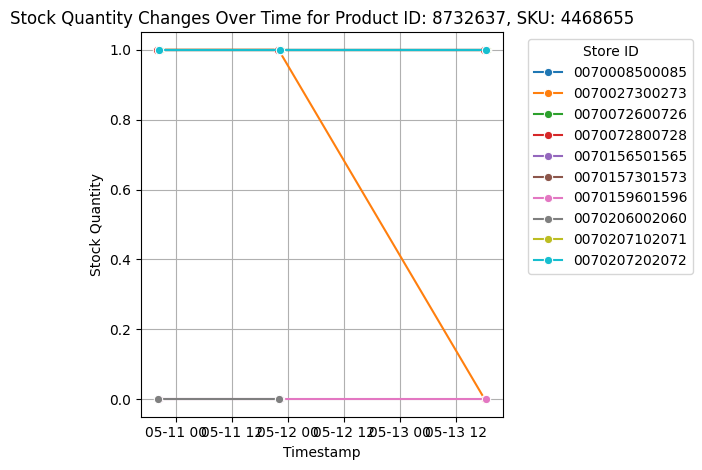

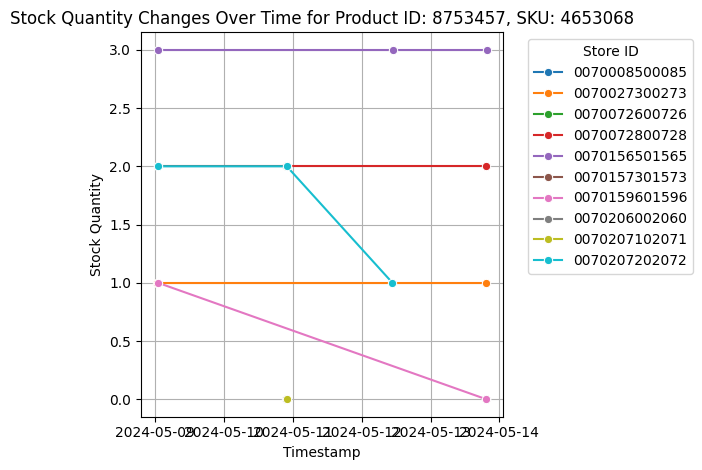

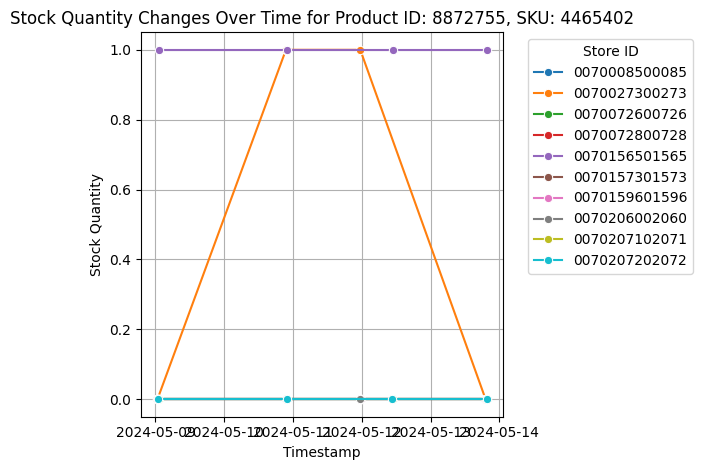

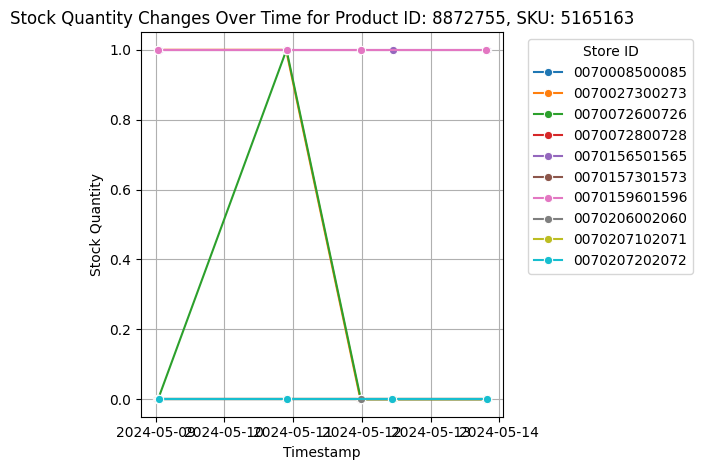

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the store_storeId column is of string type and strip any whitespace
df['store_storeId'] = df['store_storeId'].astype(str).str.strip()

# Pad the store_storeId values with leading zeros to ensure 13 characters
df['store_storeId'] = df['store_storeId'].str.zfill(13)

# Filter for a specific area
import decathlon_scraper.StoresEnum as StoresEnum
nrw_area = StoresEnum.RuhrgebietStores

# Create a list with the enum values, ensuring no leading/trailing whitespace
nrw_stores = [str(store.value).strip() for store in nrw_area]

# Filter for the stores in the area
nrw_df = df[df['store_storeId'].isin(nrw_stores)]

# Convert timestamp to datetime
nrw_df['timestamp'] = pd.to_datetime(nrw_df['timestamp'])

# Sort the DataFrame by id, store_skuId, store_storeId, and timestamp
nrw_df = nrw_df.sort_values(by=['id', 'store_skuId', 'store_storeId', 'timestamp'])

# Identify products that went out of stock
nrw_df['previous_quantity'] = nrw_df.groupby(['id', 'store_skuId', 'store_storeId'])['store_quantity'].shift(1)
out_of_stock = nrw_df[(nrw_df['store_quantity'] == 0) & (nrw_df['previous_quantity'] > 0)]

# Get the unique id and store_skuId combinations that went out of stock
out_of_stock_products = out_of_stock[['id', 'store_skuId']].drop_duplicates()

# Merge this back with the original nrw_df to get the full stock history of these products
stock_history = nrw_df.merge(out_of_stock_products, on=['id', 'store_skuId'])

# Plot the stock quantity changes over time for these products
plt.figure(figsize=(14, 8))
for (product_id, sku_id), group in stock_history.groupby(['id', 'store_skuId']):
    sns.lineplot(data=group, x='timestamp', y='store_quantity', hue='store_storeId', marker='o')
    plt.title(f'Stock Quantity Changes Over Time for Product ID: {product_id}, SKU: {sku_id}')
    plt.xlabel('Timestamp')
    plt.ylabel('Stock Quantity')
    plt.legend(title='Store ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
